<div style="background-color:#3c3d41;padding:30px;border-radius:5px">

<h1 style="font-size:22px;color:white;margin-top:0px">
2023 Nova Scotia (Canada) WildFire Case Study: <br>
Find the NOAA VIIRS L2 AF granules that cover the Nova Scotia region in Canada using python
</h1>

<p style="font-size:14px;color:white">
Author: Benjamin Marchant<br>
License: CC BY 4.0
</p>
  
</div>

In [117]:
import glob
import netCDF4
import numpy as np
import math

In [118]:
root = '/Volumes/HD2/Datasets/Research/NOAA_AWS/'

In [119]:
# Shelburne, Nova Scotia, Canada

target_lat = 43.7580
target_lon = -65.3208

In [120]:
instrument = "VIIRS"

platform = "NOAA20"
platform = "SNPP"
platform = "NOAA21"

product = "AF_Iband_VIIRS_EDR" 

In [121]:
year = 2023
month = 8
day = 9

year = 2023
month = 5
day = 30

current_date = "{:04d}_{:02d}_{:02d}".format(year,month,day)

In [122]:
output_dir = '{}/{}/{}/{}/{}/{}'.format(root,platform,instrument,product,year,current_date)

In [123]:
NOAA20_VIIRS_Files = glob.glob('{}/*.nc'.format(output_dir))

print( len(NOAA20_VIIRS_Files) )

1013


In [124]:
def haversine(coord1, coord2):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

In [125]:
%%time

candidate_list = []

for NOAA20_VIIRS_File in NOAA20_VIIRS_Files:
    
    #print(NOAA20_VIIRS_File.split('/')[-1])
    
    f = netCDF4.Dataset(NOAA20_VIIRS_File)
    
    day_night_data_flag = f.day_night_data_flag
    
    lat_b1 = f.geospatial_first_scanline_first_fov_lat
    lon_b1 = f.geospatial_first_scanline_first_fov_lon
    
    lat_b2 = f.geospatial_first_scanline_last_fov_lat
    lon_b2 = f.geospatial_first_scanline_last_fov_lon
    
    lat_b3 = f.geospatial_last_scanline_first_fov_lat
    lon_b3 = f.geospatial_last_scanline_first_fov_lon
    
    lat_b4 = f.geospatial_last_scanline_last_fov_lat
    lon_b4 = f.geospatial_last_scanline_last_fov_lon
    
    viirs_granule_boundary = np.array( [(lat_b1,lon_b1),
                              (lat_b2,lon_b2),
                              (lat_b3,lon_b3),
                              (lat_b4,lon_b4)] )

    d1 = haversine( (target_lat,target_lon), viirs_granule_boundary[0,:])
    d2 = haversine( (target_lat,target_lon), viirs_granule_boundary[1,:])
    d3 = haversine( (target_lat,target_lon), viirs_granule_boundary[2,:])
    d4 = haversine( (target_lat,target_lon), viirs_granule_boundary[3,:])  
    
    d_sum = d1+d2+d3+d4
    
    candidate = (d_sum,day_night_data_flag,NOAA20_VIIRS_File.split('/')[-1],
                 lat_b1,lon_b1,
                 lat_b2,lon_b2,
                 lat_b3,lon_b3,
                 lat_b4,lon_b4)
    candidate_list.append( candidate )    
    
    f.close()    

CPU times: user 6.11 s, sys: 362 ms, total: 6.47 s
Wall time: 13.2 s


In [126]:
candidate_list[:10]

[(51779769.970110975,
  'Night',
  'AF-Iband_v1r1_n21_s202305292358515_e202305300000162_c202305300020514.nc',
  -53.170597,
  32.788483,
  -46.678795,
  -9.760299,
  -50.963585,
  -14.143654,
  -58.185547,
  33.2614),
 (52585761.86045388,
  'Night',
  'AF-Iband_v1r1_n21_s202305300000174_e202305300001403_c202305300020514.nc',
  -58.05846,
  33.240314,
  -50.8569,
  -14.039533,
  -54.834427,
  -19.217722,
  -62.946743,
  34.179512),
 (53318660.98694979,
  'Night',
  'AF-Iband_v1r1_n21_s202305300001416_e202305300003062_c202305300021115.nc',
  -62.820194,
  34.13608,
  -54.731327,
  -19.092348,
  -58.484226,
  -25.53657,
  -67.77079,
  35.87511),
 (53980280.498846665,
  'Night',
  'AF-Iband_v1r1_n21_s202305300003075_e202305300004321_c202305300021115.nc',
  -67.64421,
  35.8144,
  -58.392033,
  -25.372093,
  -61.71602,
  -33.288456,
  -72.52616,
  38.949898),
 (54547906.632059366,
  'Night',
  'AF-Iband_v1r1_n21_s202305300004334_e202305300005562_c202305300021131.nc',
  -72.4012,
  38.842525

In [127]:
sorted(candidate_list)[:4]

[(6157377.721437115,
  'Day',
  'AF-Iband_v1r1_n21_s202305301741271_e202305301742518_c202305301808251.nc',
  36.95813,
  -88.61828,
  42.2077,
  -53.919605,
  47.27198,
  -54.095646,
  41.60494,
  -91.586975),
 (6162957.22751874,
  'Night',
  'AF-Iband_v1r1_n21_s202305300617143_e202305300618389_c202305300659528.nc',
  40.530876,
  -47.131073,
  46.133644,
  -83.903015,
  41.06757,
  -84.12294,
  35.863815,
  -50.005127),
 (6338138.455308202,
  'Night',
  'AF-Iband_v1r1_n21_s202305300615484_e202305300617130_c202305300700081.nc',
  44.976685,
  -43.822266,
  51.070133,
  -83.86676,
  46.012154,
  -83.89213,
  40.422035,
  -47.193066),
 (6468330.369609326,
  'Day',
  'AF-Iband_v1r1_n21_s202305301740030_e202305301741259_c202305301808047.nc',
  32.431656,
  -86.15161,
  37.361782,
  -53.5799,
  42.329132,
  -53.90992,
  37.072266,
  -88.66083)]

In [128]:
sorted(candidate_list)[:4][0]

(6157377.721437115,
 'Day',
 'AF-Iband_v1r1_n21_s202305301741271_e202305301742518_c202305301808251.nc',
 36.95813,
 -88.61828,
 42.2077,
 -53.919605,
 47.27198,
 -54.095646,
 41.60494,
 -91.586975)

In [129]:
sorted(candidate_list)[:4][0][3]

36.95813

In [130]:
viirs_bounding_box = np.array([(sorted(candidate_list)[:4][0][3],sorted(candidate_list)[:4][0][4]),
                               (sorted(candidate_list)[:4][0][5],sorted(candidate_list)[:4][0][6]),
                               (sorted(candidate_list)[:4][0][7],sorted(candidate_list)[:4][0][8]),
                               (sorted(candidate_list)[:4][0][9],sorted(candidate_list)[:4][0][10])
                              ])

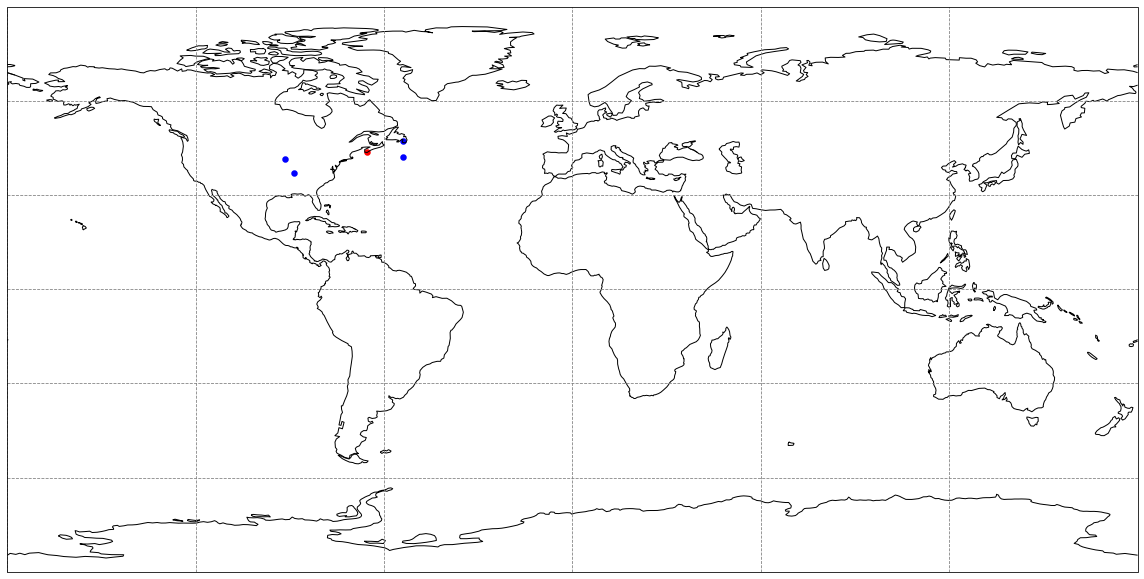

In [131]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs


plt.figure(figsize=(16,9))

proj = ccrs.PlateCarree()

ease_extent = [-180., 180., 90., -90.]

ax = plt.axes(projection=proj)

ax.set_extent(ease_extent, crs=proj) 

ax.gridlines(color='gray', linestyle='--')

ax.coastlines()



plt.scatter( target_lon, target_lat,
         color='red', linewidth=2, marker='o', s=20,
         transform=ccrs.PlateCarree(),
         )

plt.scatter( viirs_bounding_box[:,1], viirs_bounding_box[:,0],
         color='blue', linewidth=2, marker='o', s=20,
         transform=ccrs.PlateCarree(),
         )

plt.tight_layout()

plt.show()

plt.close()